<a href="https://colab.research.google.com/github/KIQVinicius/Apache-Spark/blob/master/LP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install country-converter
!pip install pycountry-convert
!pip install tpot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import seaborn as sns
import country_converter as coco
import pycountry_convert as pycoco


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def KMeansOtimization(num_clusters, classe):
  model = KMeans(n_clusters = num_clusters)
  model.fit(classe)
  return [num_clusters, model.inertia_]

In [4]:
data = pd.read_csv('/content/drive/My Drive/LP4/data-final.csv', sep = "\t", nrows = 100000)
#data_final = data_final.head(10000)
data.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768,1024,9,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360,768,12,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366,768,3,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920,1200,186,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366,768,8,315.0,17,2,KE,1.0,38.0


In [5]:
data.dropna(inplace=True)

In [6]:
iso2 = list(data["country"].unique())

unknown_iso2 = ["NONE", "SX", "TL", "AQ"]

iso3 = coco.convert(names = iso2, to = "ISO3")
continent = pd.Series(iso2)[~pd.Series(iso2).isin(unknown_iso2)]
list_continent=[]
for i in continent:
  list_continent.append(pycoco.country_alpha2_to_continent_code(i))
continent = pd.Series(list_continent)
short_name = coco.convert(names = iso2, to = "name_short")
continent = pd.Series(list_continent)
dict_continent_name = {
    'NA': 1, #'North America'
    'SA': 2,#'South America', 
    'AS': 3,#'Asia',
    'OC': 4,#'Oceania',
    'EU': 5,#'Europe',
    'AF': 6 #'Africa'
}

continent = continent.replace(dict_continent_name)
dict_country = dict(zip(iso2, iso3))
dict_short_name = dict(zip(iso3, short_name))
dict_continent = dict(zip(iso2, continent))

data["country_iso2"] = data["country"].replace(dict_country)
data["country_iso3"] = data["country"].replace(dict_country)
data["country_name"] = data["country_iso3"].replace(dict_short_name)
data["continent"] = data["country"].replace(dict_continent)


In [51]:
frequency = pd.DataFrame(data['country_name'].value_counts())
frequency.reset_index(inplace=True)
frequency.columns = ['country_name', 'Frequencia']
frequency = frequency.query("Frequencia > 1000")
data = data[data['country_name'].isin(frequency['country_name'])]
data = data.query("country_name != 'not found'")
#x = data[['EXT1',	'EXT2',	'EXT3',	'EXT4',	'EXT5',	'EXT6',	'EXT7',	'EXT8',	'EXT9',	'EXT10',	'EST1',	'EST2',	'EST3',	'EST4',	'EST5',	'EST6',	'EST7',	'EST8',	'EST9',	'EST10',	'AGR1',	'AGR2',	'AGR3',	'AGR4',	'AGR5',	'AGR6',	'AGR7',	'AGR8',	'AGR9',	'AGR10',	'CSN1',	'CSN2',	'CSN3',	'CSN4',	'CSN5',	'CSN6',	'CSN7',	'CSN8',	'CSN9',	'CSN10','OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']]


In [52]:
x = data[['EXT1',	'EXT2',	'EXT3',	'EXT4',	'EXT5',	'EXT6',	'EXT7',	'EXT8',	'EXT9',	'EXT10']]
y = data['country_name']
list_classes = y.unique()
data['country_name'].value_counts()

United Kingdom    7165
Canada            5799
Australia         5430
India             2519
Philippines       1902
New Zealand       1429
Germany           1352
Netherlands       1322
Sweden            1253
Malaysia          1162
Name: country_name, dtype: int64

In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns=x.columns)
scaled_x = x

In [55]:
#result = [KMeansOtimization(clusters,scaled_x) for clusters in range(1, 20)]

In [56]:
#result = pd.DataFrame(result,columns=['Cluster', 'Erro'])

In [57]:
#result['Erro'].plot(xticks =result['Cluster'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc486f2668>,
      dtype=object)

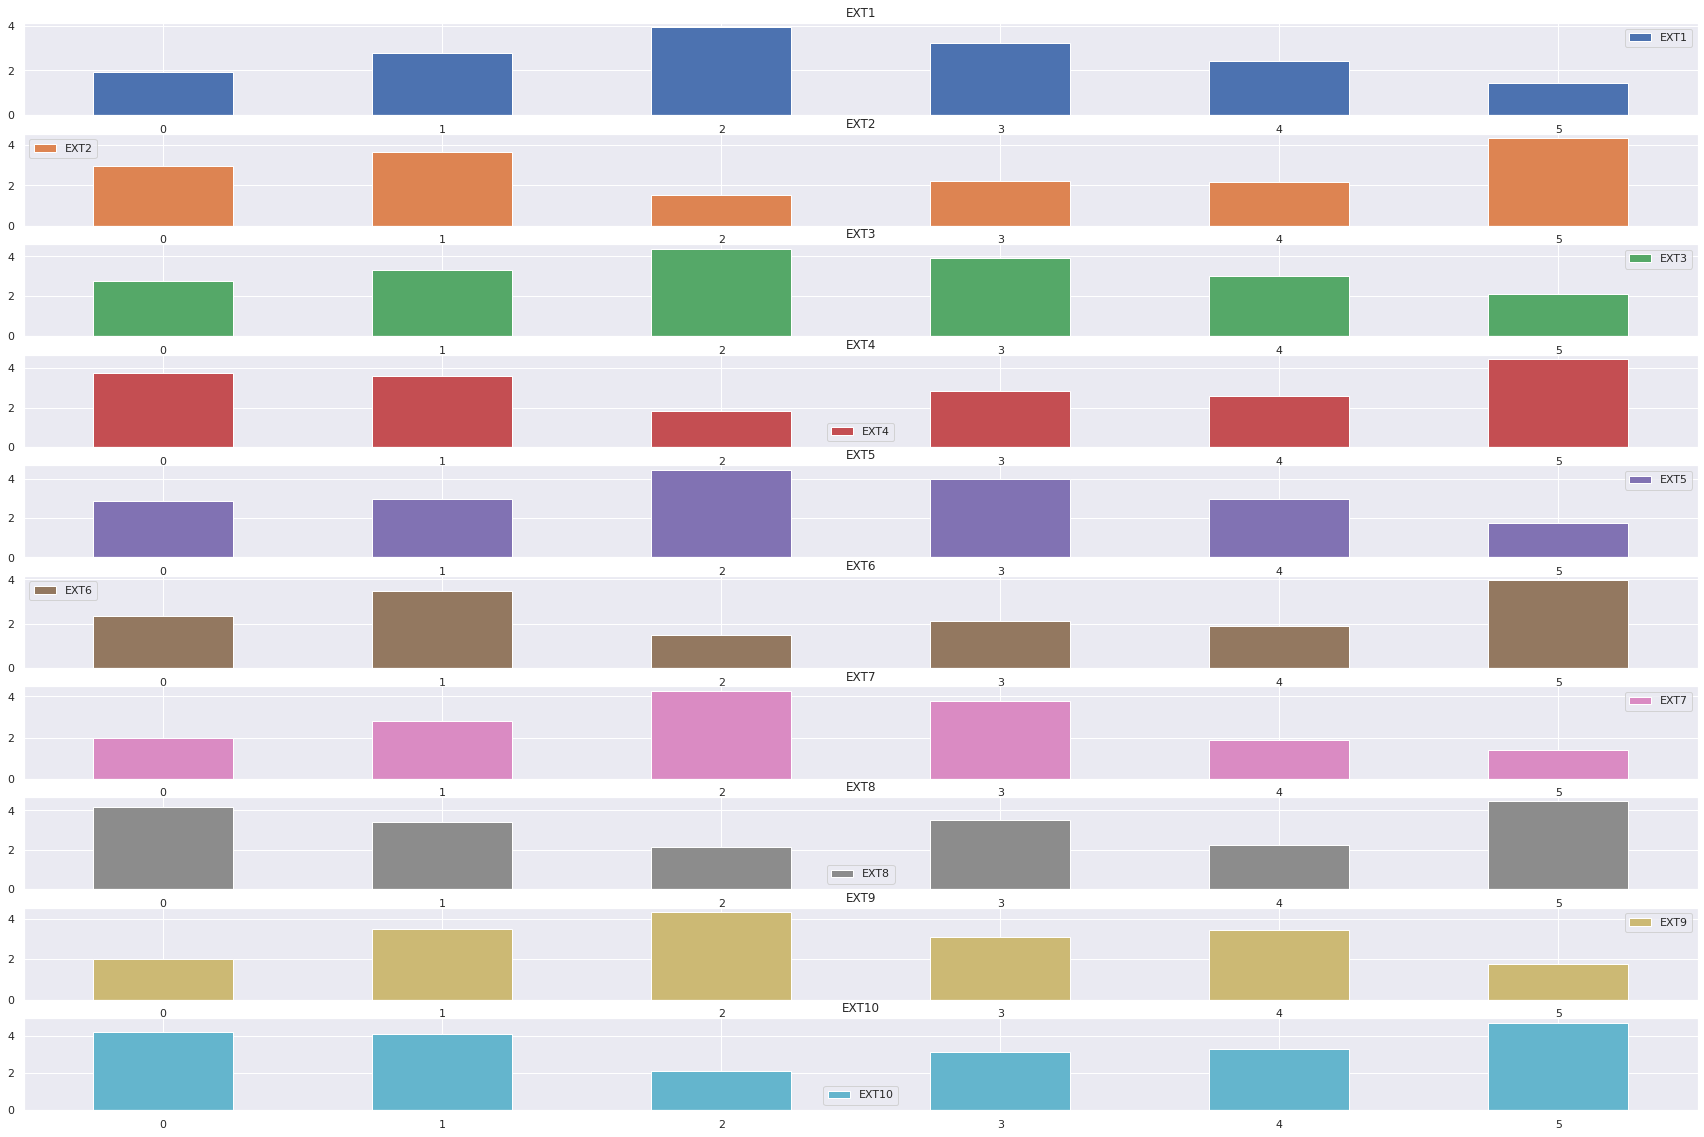

In [58]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_x)
groups = pd.DataFrame(kmeans.cluster_centers_, columns = scaled_x.columns)
groups.plot.bar(subplots = True, figsize = (30, 20), sharex =False ,rot = 0 )



In [59]:
scaled_x['Cluster'] =kmeans.labels_
scaled_x['continent'] = data[['continent']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [44]:
#visualizacao = tsne.fit_transform(scaled_x)
#visualizacao

In [45]:
#sns.set(rc={'figure.figsize': (13, 13)})
#sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue =kmeans.labels_, palette=sns.color_palette('Set1', 6) )

In [46]:
#x['continent'] = pd.to_numeric(x['continent'])
scaled_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29333 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EXT1       29333 non-null  float64
 1   EXT2       29333 non-null  float64
 2   EXT3       29333 non-null  float64
 3   EXT4       29333 non-null  float64
 4   EXT5       29333 non-null  float64
 5   EXT6       29333 non-null  float64
 6   EXT7       29333 non-null  float64
 7   EXT8       29333 non-null  float64
 8   EXT9       29333 non-null  float64
 9   EXT10      29333 non-null  float64
 10  Cluster    29333 non-null  int32  
 11  continent  29333 non-null  object 
dtypes: float64(10), int32(1), object(1)
memory usage: 2.8+ MB


In [47]:
corr = scaled_x.corr()
corr

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,Cluster
EXT1,1.000000,-0.408096,0.452337,-0.455161,0.459797,-0.319093,0.563092,-0.355406,0.447194,-0.380121,-0.245873
EXT2,-0.408096,1.000000,-0.386628,0.541011,-0.485820,0.547721,-0.415940,0.392344,-0.343138,0.473825,0.490742
EXT3,0.452337,-0.386628,1.000000,-0.398814,0.537855,-0.310086,0.520539,-0.282991,0.416659,-0.402396,-0.288737
EXT4,-0.455161,0.541011,-0.398814,1.000000,-0.428603,0.469232,-0.423555,0.480126,-0.403580,0.516721,0.339192
EXT5,0.459797,-0.485820,0.537855,-0.428603,1.000000,-0.401000,0.578140,-0.296556,0.409684,-0.457595,-0.393200
EXT6,-0.319093,0.547721,-0.310086,0.469232,-0.401000,1.000000,-0.330085,0.347060,-0.287377,0.411330,0.496656
EXT7,0.563092,-0.415940,0.520539,-0.423555,0.578140,-0.330085,1.000000,-0.293848,0.416712,-0.453828,-0.297308
EXT8,-0.355406,0.392344,-0.282991,0.480126,-0.296556,0.347060,-0.293848,1.000000,-0.449625,0.413707,0.181316
EXT9,0.447194,-0.343138,0.416659,-0.403580,0.409684,-0.287377,0.416712,-0.449625,1.000000,-0.310637,-0.131190
EXT10,-0.380121,0.473825,-0.402396,0.516721,-0.457595,0.411330,-0.453828,0.413707,-0.310637,1.000000,0.298286


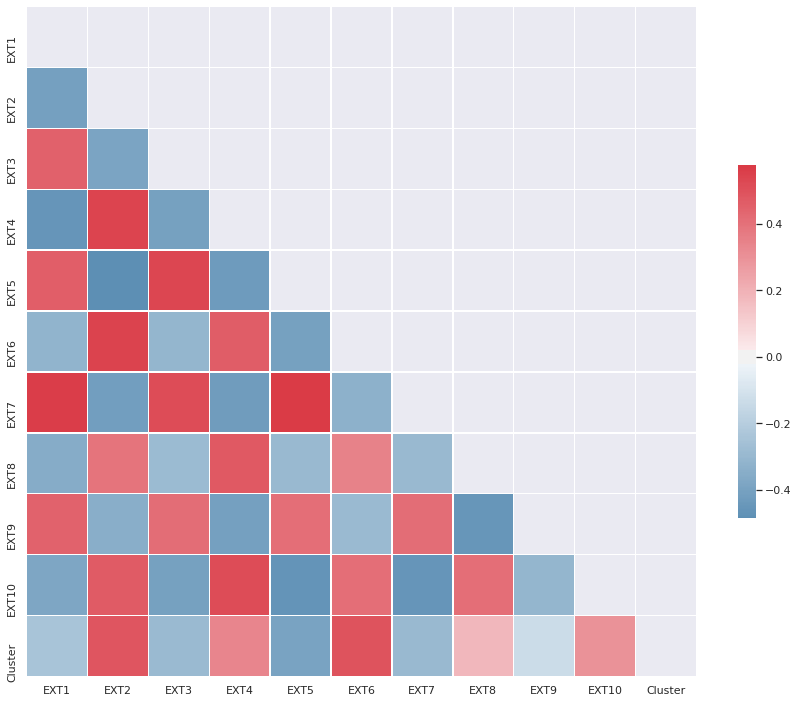

In [48]:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(15, 13))
  cmap = sns.diverging_palette(240, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
#raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
#                                                         test_size = 0.25,
#                                                         stratify = y)
#
#print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))
#
#modelo = TPOTClassifier(verbosity = 2, generations=5, n_jobs=-1, config_dict="TPOT light")
#modelo.fit(raw_treino_x, treino_y)

In [50]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(scaled_x, y,
                                                         test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(raw_treino_x, treino_y)
previsoes_SVC = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

    
dot_data = export_graphviz(modelo, out_file=None,  feature_names = scaled_x.columns, filled=True, rounded=True, class_names=list_classes )
grafico = graphviz.Source(dot_data)

Treinaremos com 21999 elementos e testaremos com 7334 elementos
A acurácia foi 71.61%


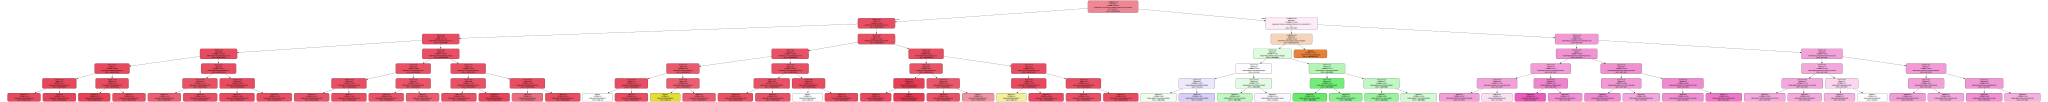

In [26]:
grafico

In [33]:
pred = modelo.predict([[1,1,1,1,1,1,1,1,1,1,3,2]])
print("Previsão: "+ pred[0])

Previsão: United States


In [28]:
centr = kmeans.predict([[1,1,1,1,1,1,1,1,1,1]])
print("Centroide: "+ str(centr[0]))

Centroide: 2
